###1) Импортируем необходимые библиотеки **numpy**, **pandas**, **matplotlib** и **seaborn**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###2) Загружаем данные

1. Подключаем Google Drive к ноутбуку
2. копируем ссылку на файл из Google Drive и подгружаем данные в переменную **data**
3. Выводим на экран результат загрузки данных и общую информацию

In [ ]:
 data = pd.read_csv('/content/drive/MyDrive/datasets/Titanic-Dataset.csv')
 data.head()
 data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


###3)Определить количество пустых ячеек

In [ ]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

###4) Заполняем отсутствующие данные колонки **Age (Возраст)** средним значением (**mean**):

In [ ]:
mean_age = data['Age'].mean()
data['Age'].fillna(mean_age, inplace=True)

###5) Удаляем пустые ячейки колонок **Cabin (Номер каюты)** и **Embarked (Порт посадки)**

In [ ]:
data = data.dropna(subset=['Cabin', 'Embarked'])

###6) Проверяем отсутсвие пустых значений в датасете:
* **Age** - заменены средним значением
* **Cabin** и **Embarked** - удалены

In [ ]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

###7) Произведем группировку возраста по интервалам 10 лет

In [ ]:
def age_group(age):
    return int(age // 10) * 10

* рассмотрим сводную статистическую информацию о DataFrame:

In [ ]:
data['AgeGroup'] = data['Age'].apply(age_group)

* рассмотрим сводную статистическую информацию о DataFrame

In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,AgeGroup
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,24.208754
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,13.562886
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,20.000000
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,20.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,30.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,80.000000


###8) Создадим диаграмму умершие/выжившие по возрастной группе

* создаем новый столбец "Age_Group" с возрастом в интервалах 10 лет

In [ ]:
data['Age_Group'] = pd.cut(data['Age'], bins=range(0, 100, 10), right=False)

* группируем данные по возрастной группе и вычисляем количество выживших и умерших

In [ ]:
survival_by_age_group = data.groupby(['Age_Group', 'Survived']).size().unstack()

* рисуем столбчатую диаграмму

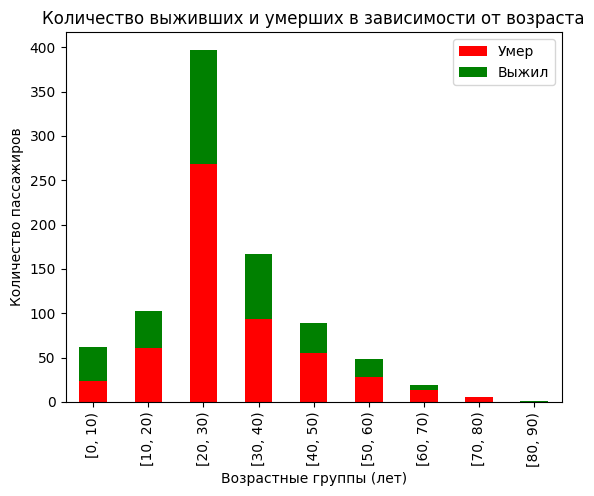

In [ ]:
survival_by_age_group.plot(kind='bar', stacked=True, color=['red', 'green'])
plt.title('Количество выживших и умерших в зависимости от возраста')
plt.xlabel('Возрастные группы (лет)')
plt.ylabel('Количество пассажиров')
plt.legend(['Умер', 'Выжил'])
plt.show()

###9) Создаем столбчатую диаграмму для анализа влияния признака на выживание

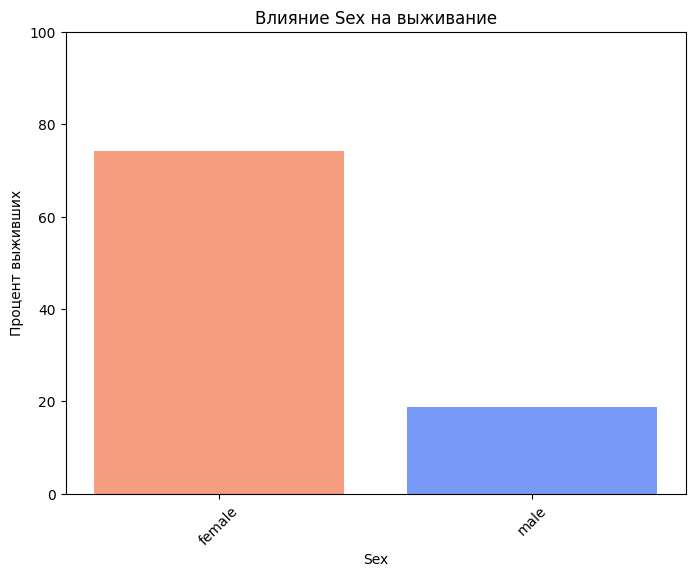

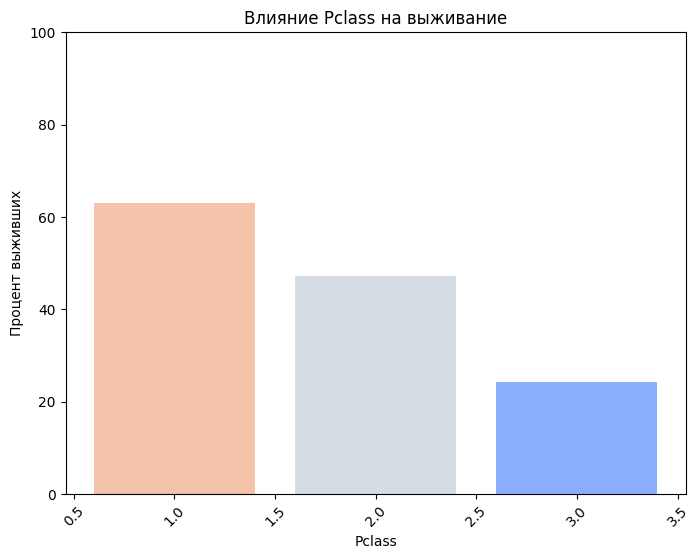

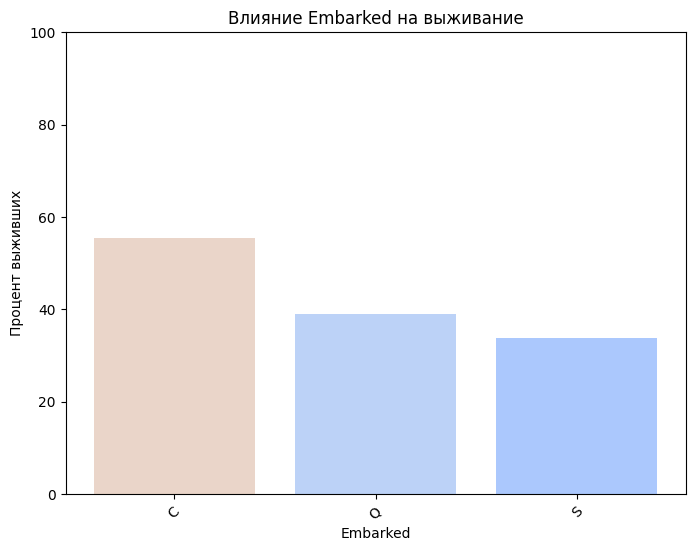

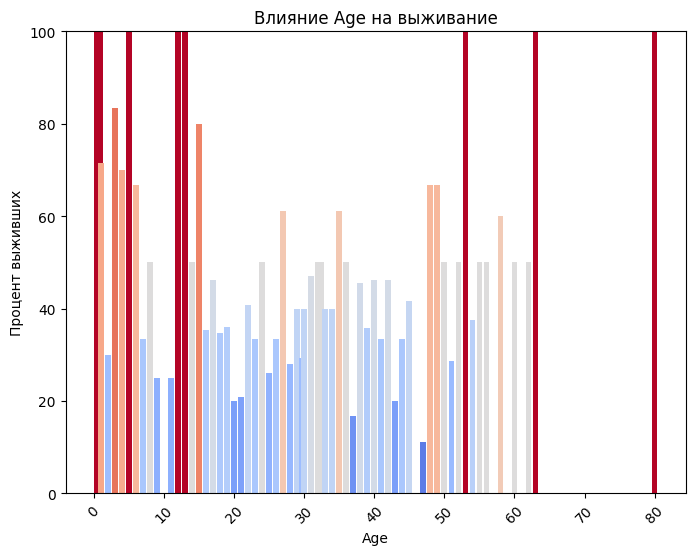

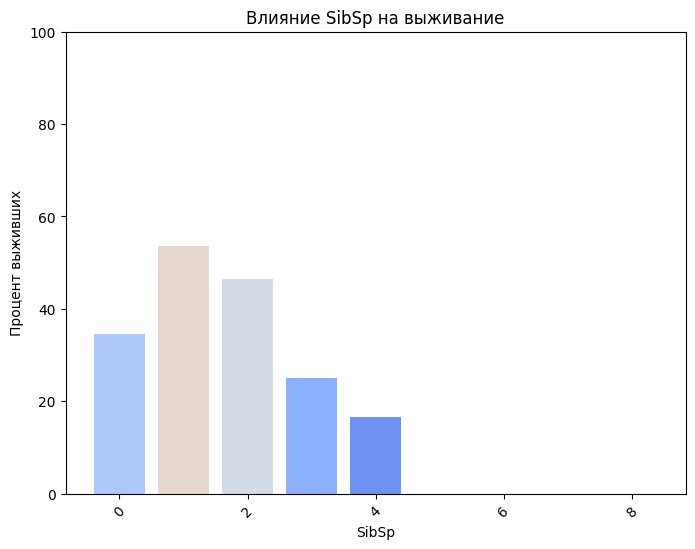

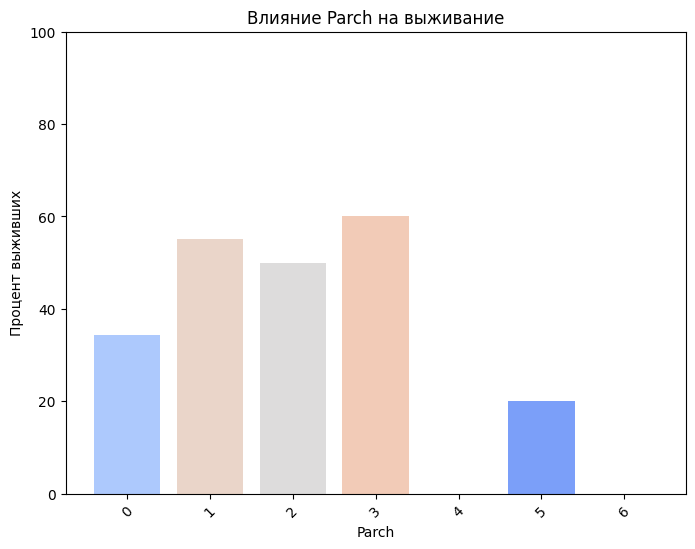

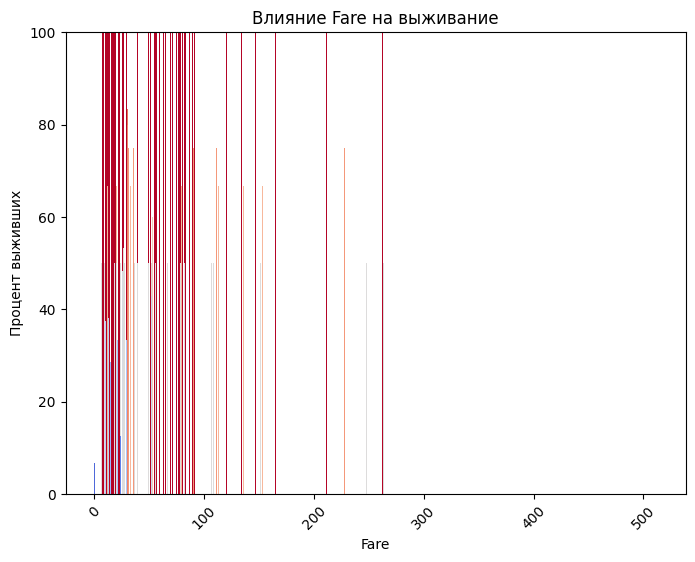

In [ ]:
def plot_survival_rate(feature):

    # Создаем сводную таблицу для анализа влияния признака на "Выживание"
    pivot_table = data.pivot_table(index=feature, values='Survived', aggfunc='mean')

    # Создаем цветовую палитру для столбцов
    colors = plt.cm.coolwarm(pivot_table['Survived'])

    # Создаем столбчатую диаграмму для визуализации
    plt.figure(figsize=(8, 6))
    plt.bar(pivot_table.index, pivot_table['Survived'] * 100, color=colors)
    plt.xlabel(feature)
    plt.ylabel('Процент выживших')
    plt.title(f'Влияние {feature} на выживание')
    plt.ylim(0, 100)
    plt.xticks(rotation=45)
    plt.show()

# Анализ и визуализация влияния различных признаков на выживаемость
plot_survival_rate('Sex')  # Пол
plot_survival_rate('Pclass')  # Класс каюты
plot_survival_rate('Embarked')  # Порт посадки
plot_survival_rate('Age')
plot_survival_rate('SibSp')
plot_survival_rate('Parch')
plot_survival_rate('Fare')